In [2]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels

import os

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG19,ResNet50

from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau

from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

In [5]:
from keras.datasets import cifar10

In [6]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [7]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [8]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [9]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
You14:40
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [10]:
from keras.utils import to_categorical

In [11]:
train_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1 )

val_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1)
test_generator = ImageDataGenerator(
                                    rotation_range=2,
                                    horizontal_flip=True,
                                    zoom_range=.1 )

In [12]:
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)
test_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip= True,
                                    zoom_range=.1)

In [13]:
lrr= ReduceLROnPlateau(
    monitor='val_loss', #Metric to be measured
    factor=.01, #Factor by which learning rate will be reduced
    patience=3,  #No. of epochs after which if there is no improvement in the val_accuracy, the learning rate is reduced
    min_lr=1e-5) #The minimum learning

In [14]:
'''The first base model used is VGG19. The pretrained weights from the
 imagenet challenge are used'''
base_model_1 = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),
                     classes=y_train.shape[1])

'''For the 2nd base model we will use Resnet 50 and compare the
 performance against the previous one.'''
base_model_2 = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),
                        classes=y_train.shape[1])

94765736/94765736 [==============================] - 0s 0us/step


In [15]:
model_1= keras.Sequential()
model_1.add(base_model_1) #Adds the base model (in this case vgg19 to model_1)
model_1.add(Flatten())

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
#model_1.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
model_1.add(Dense(10,activation=('softmax')))

In [18]:

base_model_2 = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1= keras.Sequential()
model_1.add(base_model_1) #Adds the base model (in this case vgg19 to model_1)
model_1.add(Flatten()) #Since t


In [19]:
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
#model_1.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
model_1.add(Dense(10,activation=('softmax'))) 

In [20]:
batch_size= 128
epochs=20
learn_rate=.001

sgd=SGD(learning_rate=learn_rate)
adam=Adam(learning_rate=learn_rate)
model_1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

Epoch 1/20
273/273 [==============================] - 39s 101ms/step - loss: 1.6163 - accuracy: 0.4370 - val_loss: 1.2408 - val_accuracy: 0.5658 - lr: 0.0010
Epoch 2/20
273/273 [==============================] - 25s 92ms/step - loss: 1.0711 - accuracy: 0.6248 - val_loss: 0.9946 - val_accuracy: 0.6550 - lr: 0.0010
Epoch 3/20
273/273 [==============================] - 26s 94ms/step - loss: 0.9228 - accuracy: 0.6774 - val_loss: 0.8871 - val_accuracy: 0.6888 - lr: 0.0010
Epoch 4/20
273/273 [==============================] - 25s 91ms/step - loss: 0.8313 - accuracy: 0.7112 - val_loss: 0.8232 - val_accuracy: 0.7109 - lr: 0.0010
Epoch 5/20
273/273 [==============================] - 25s 93ms/step - loss: 0.7727 - accuracy: 0.7308 - val_loss: 0.7764 - val_accuracy: 0.7342 - lr: 0.0010
Epoch 6/20
273/273 [==============================] - 26s 94ms/step - loss: 0.7208 - accuracy: 0.7525 - val_loss: 0.7825 - val_accuracy: 0.7327 - lr: 0.0010
Epoch 7/20
273/273 [==============================] - 25s

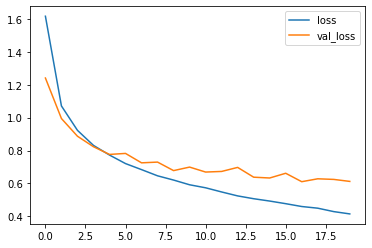

In [21]:
model_1.fit(train_generator.flow(x_train,y_train,batch_size=batch_size),
                      epochs=epochs,
                      steps_per_epoch=x_train.shape[0]//batch_size,
                      validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),
                      validation_steps=x_test.shape[0]//batch_size,
                      callbacks=[lrr],verbose=1)

metrics = pd.DataFrame(model_1.history.history)
metrics[['loss', 'val_loss']].plot()

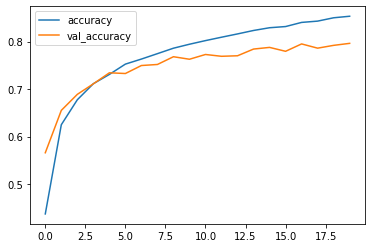

In [22]:
metrics[['accuracy', 'val_accuracy']].plot()

In [23]:
def plot_confusion_matrix(y_true, y_pred, classes):
  y_pred = [np.argmax(x, axis=0) for x in y_pred]
  y_true = [np.argmax(x, axis=0) for x in y_true]
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, xticklabels=classes, yticklabels=classes, annot=True)
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_pred=model_1.predict(x_test)
y_true=y_test

313/313 [==============================] - 4s 11ms/step


In [25]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [26]:
y_pred=model_1.predict(x_test)
y_true=y_test

313/313 [==============================] - 3s 11ms/step


In [27]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.6017 - accuracy: 0.8035


[0.6016554236412048, 0.8034999966621399]

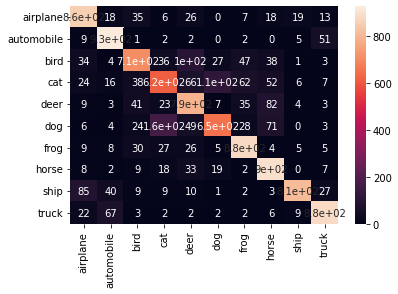

In [28]:
plot_confusion_matrix(y_true, y_pred, classes=class_names)

In [29]:
#Since we have already defined Resnet50 as base_model_2, let us build the sequential model.

model_2 = keras.Sequential()
#Add the Dense layers along with activation and batch normalization
model_2.add(base_model_2)
model_2.add(Flatten())


#Add the Dense layers along with activation and batch normalization
model_2.add(Dense(4000,activation=('relu'),input_dim=512))
model_2.add(Dense(2000,activation=('relu'))) 
model_2.add(Dropout(.4))
model_2.add(Dense(1000,activation=('relu'))) 
model_2.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_2.add(Dense(500,activation=('relu')))
model_2.add(Dropout(.2))
model_2.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [30]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 4000)              8196000   
                                                                 
 dense_11 (Dense)            (None, 2000)              8002000   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_12 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)             

In [31]:
#Compile the model 

model_2.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
model_2.fit(train_generator.flow(x_train,y_train,batch_size=batch_size),
                      epochs=epochs,
                      steps_per_epoch=x_train.shape[0]//batch_size,
                      validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),
                      validation_steps=x_test.shape[0]//batch_size,
                      callbacks=[lrr],verbose=1)

Epoch 1/20
273/273 [==============================] - 41s 120ms/step - loss: 1.8222 - accuracy: 0.3224 - val_loss: 1.7180 - val_accuracy: 0.4020 - lr: 0.0010
Epoch 2/20
273/273 [==============================] - 27s 98ms/step - loss: 1.2398 - accuracy: 0.5625 - val_loss: 1.5937 - val_accuracy: 0.5407 - lr: 0.0010
Epoch 3/20
273/273 [==============================] - 27s 99ms/step - loss: 1.0051 - accuracy: 0.6662 - val_loss: 1.3394 - val_accuracy: 0.5947 - lr: 0.0010
Epoch 4/20
273/273 [==============================] - 26s 94ms/step - loss: 0.8882 - accuracy: 0.7118 - val_loss: 1.7743 - val_accuracy: 0.5252 - lr: 0.0010
Epoch 5/20
273/273 [==============================] - 26s 96ms/step - loss: 0.7937 - accuracy: 0.7452 - val_loss: 1.3415 - val_accuracy: 0.5997 - lr: 0.0010
Epoch 6/20
273/273 [==============================] - 28s 101ms/step - loss: 0.7139 - accuracy: 0.7720 - val_loss: 0.9842 - val_accuracy: 0.6966 - lr: 0.0010
Epoch 7/20
273/273 [==============================] - 26

In [33]:
metrics = pd.DataFrame(model_2.history.history)

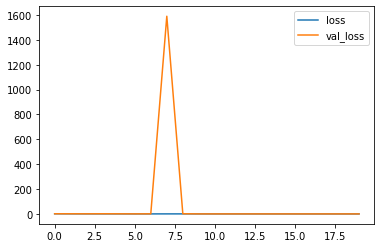

In [34]:
metrics[['loss', 'val_loss']].plot()

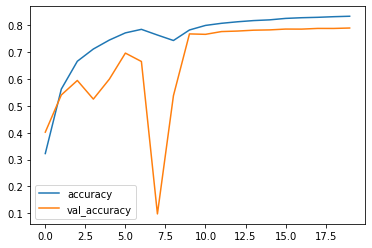

In [35]:
metrics[['accuracy', 'val_accuracy']].plot()

In [36]:
y_pred=model_2.predict(x_test)
y_true=y_test

313/313 [==============================] - 5s 12ms/step


In [37]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 6s 14ms/step - loss: 0.6403 - accuracy: 0.7914


[0.6403241157531738, 0.7914000153541565]

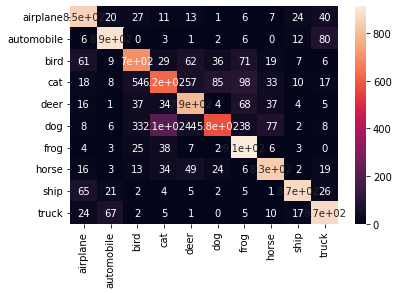

In [38]:
plot_confusion_matrix(y_true, y_pred, classes=class_names)

In [39]:
def predict_classes(model, image):
  image = image.reshape(1, 32, 32, 3)
  prediction = model.predict(image)
  return np.argmax(prediction, axis=1)

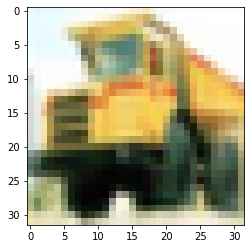

In [41]:
plt.imshow(x_test[400])

In [42]:
def get_class(y):
  return np.argmax(y, axis=0)

In [43]:
get_class(y_test[500])

4

In [44]:
predict_classes(model_1, x_test[500])

1/1 [==============================] - 0s 314ms/step


array([4])

In [45]:
predict_classes(model_2, x_test[500])

1/1 [==============================] - 0s 399ms/step


array([4])

In [46]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model_1.save("vgg_80.h5")

In [49]:
a= load_model("vgg_80.h5")

In [50]:
a.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1024)              525312    
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 10)               